In [ ]:
pip install scikit-image opencv-python pywavelets tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.0 MB/s eta 0:00:00


              Method       PSNR      SSIM       MSE
0      Median Filter  24.013495  0.546549  0.003969
1  Wavelet Denoising  25.906726  0.639479  0.002566


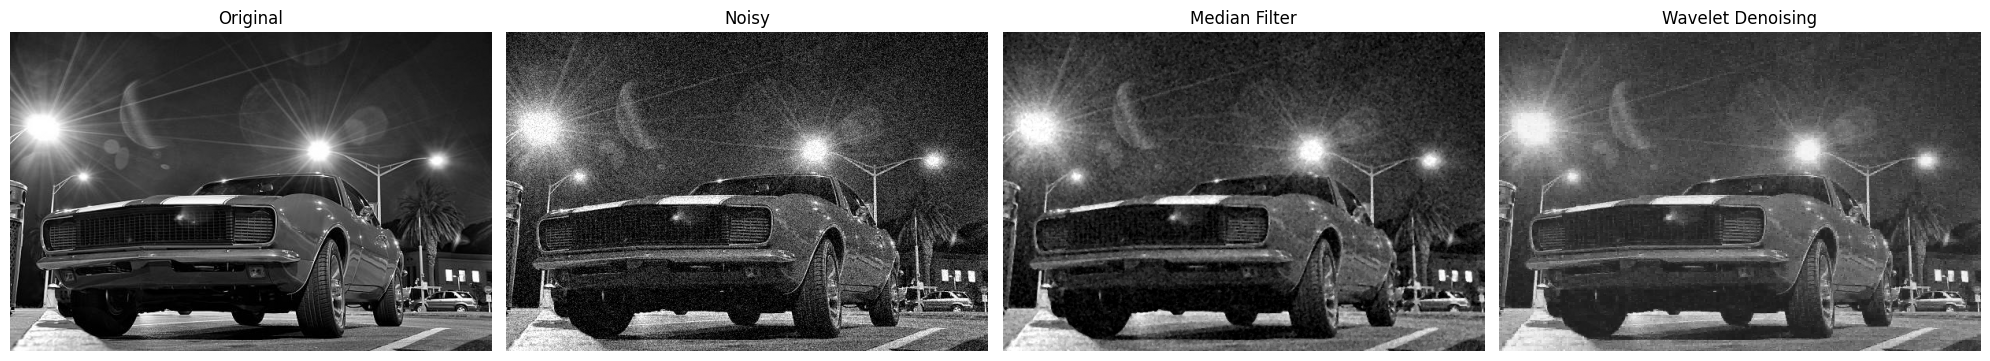

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim, mean_squared_error as mse
from skimage.restoration import denoise_wavelet
from skimage.util import random_noise
import pandas as pd

image_path = 'img2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = img_as_float(image)

# ==== Add Gaussian noise ====
noisy_image = random_noise(image, mode='gaussian', var=0.01)

# ==== Apply Denoising Techniques ====
# 1. Median Filter
median_denoised = cv2.medianBlur((noisy_image * 255).astype(np.uint8), 3) / 255.0

# 2. Wavelet Denoising
wavelet_denoised = denoise_wavelet(noisy_image, channel_axis=None, rescale_sigma=True)

# ==== Evaluation Metrics ====
def evaluate(original, denoised, name):
    return {
        "Method": name,
        "PSNR": psnr(original, denoised, data_range=1.0),
        "SSIM": ssim(original, denoised, data_range=1.0),
        "MSE": mse(original, denoised)
    }

results = [
    evaluate(image, median_denoised, "Median Filter"),
    evaluate(image, wavelet_denoised, "Wavelet Denoising")
]

# ==== Show Metric Table ====
df = pd.DataFrame(results)
print(df)

# ==== Show Images ====
def show_images(imgs, titles):
    plt.figure(figsize=(20, 4))
    for i, (img, title) in enumerate(zip(imgs, titles)):
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(
    [image, noisy_image, median_denoised, wavelet_denoised],
    ['Original', 'Noisy', 'Median Filter', 'Wavelet Denoising']
)


In [ ]:
pip install opencv-python numpy


In [ ]:
import cv2
import os
import numpy as np

# ==== Setup ====
video_path = 'vid.mp4'
output_dir = 'frames'
os.makedirs(output_dir, exist_ok=True)

# Output video setup
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 20  # change if needed
width, height = None, None

# Video capture
cap = cv2.VideoCapture(video_path)
frame_count = 0

# Writers for new processed videos
writers = {}

def init_writers(w, h):
    names = ['adaptive_thresh', 'gaussian', 'canny', 'bitwise_not']
    for name in names:
        writers[name] = cv2.VideoWriter(f'{name}_video.mp4', fourcc, fps, (w, h), isColor=False)

# ==== Processing Frames ====
collage_frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if width is None:
        height, width = gray.shape
        init_writers(width, height)

    # Save frame
    cv2.imwrite(f"{output_dir}/frame_{frame_count:04d}.jpg", gray)

    # Adaptive Threshold
    adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

    # Gaussian Blur
    gaussian = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny Edge
    canny = cv2.Canny(gray, 50, 150)

    # Bitwise Not
    bitwise = cv2.bitwise_not(gray)

    # Write each processed frame to its video
    writers['adaptive_thresh'].write(adaptive)
    writers['gaussian'].write(gaussian)
    writers['canny'].write(canny)
    writers['bitwise_not'].write(bitwise)

    # Save some frames for collage
    if frame_count % 30 == 0 and len(collage_frames) < 6:
        collage_frames.append(cv2.resize(gray, (160, 120)))

    frame_count += 1

cap.release()
for w in writers.values():
    w.release()

# ==== Create Collage ====
if collage_frames:
    collage = np.hstack(collage_frames[:3])
    if len(collage_frames) > 3:
        collage2 = np.hstack(collage_frames[3:])
        collage = np.vstack((collage, collage2))
    cv2.imwrite("collage.jpg", collage)

print("✅ Done! Frames saved, videos processed, collage made.")


✅ Done! Frames saved, videos processed, collage made.


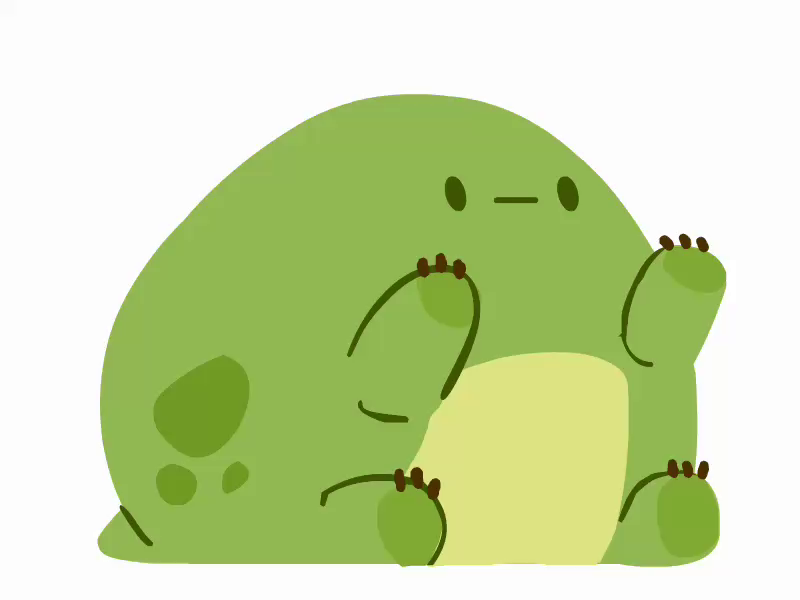

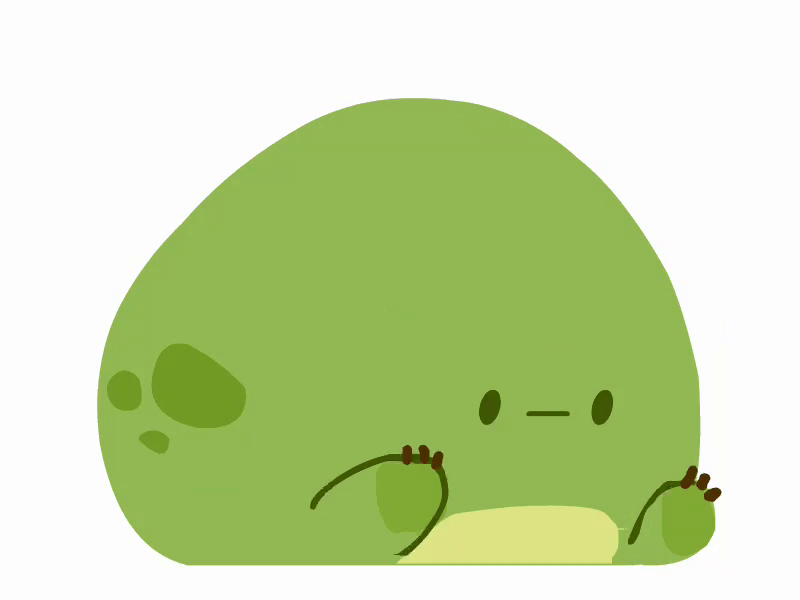

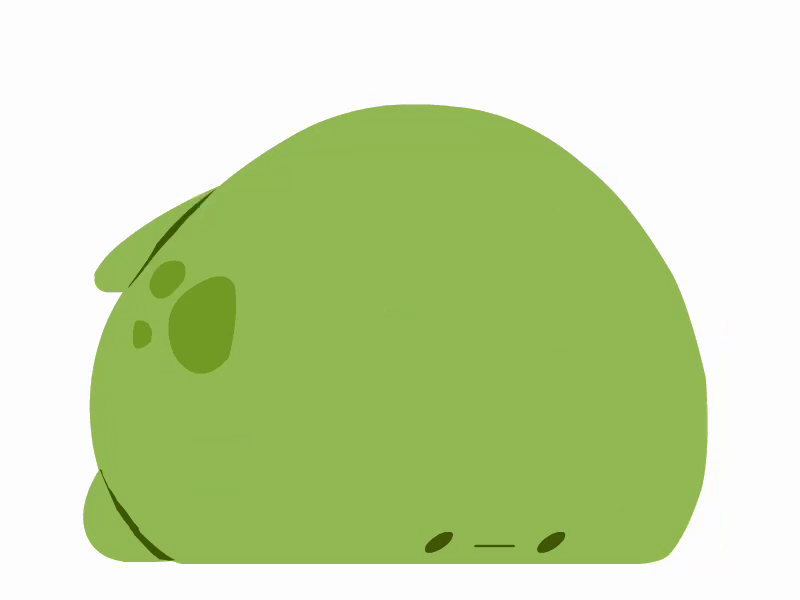

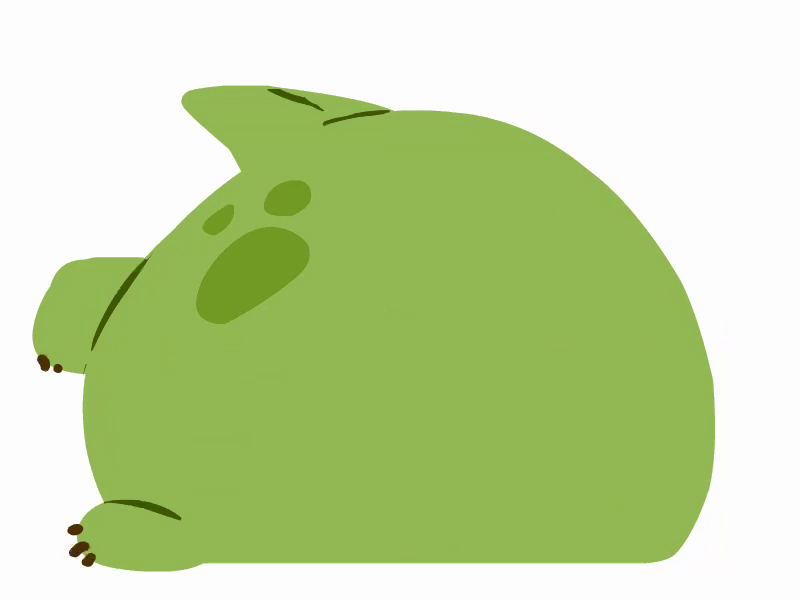

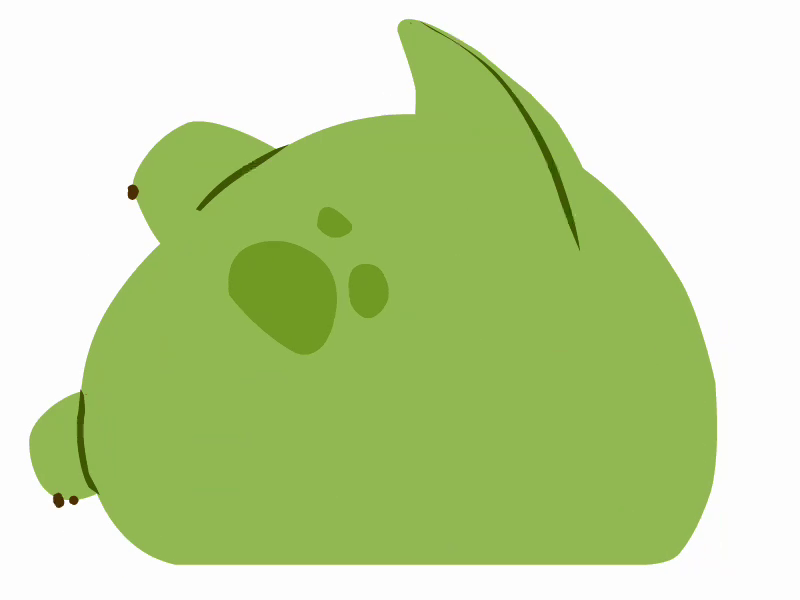

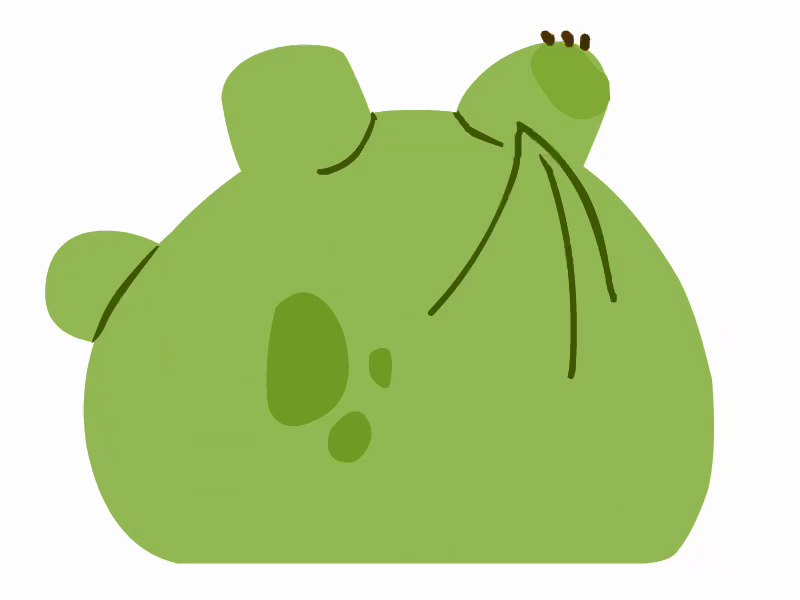

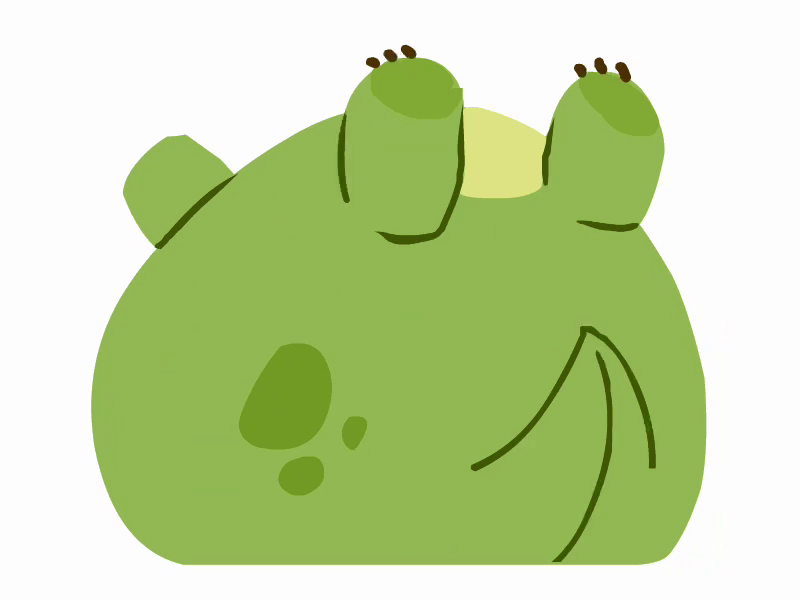

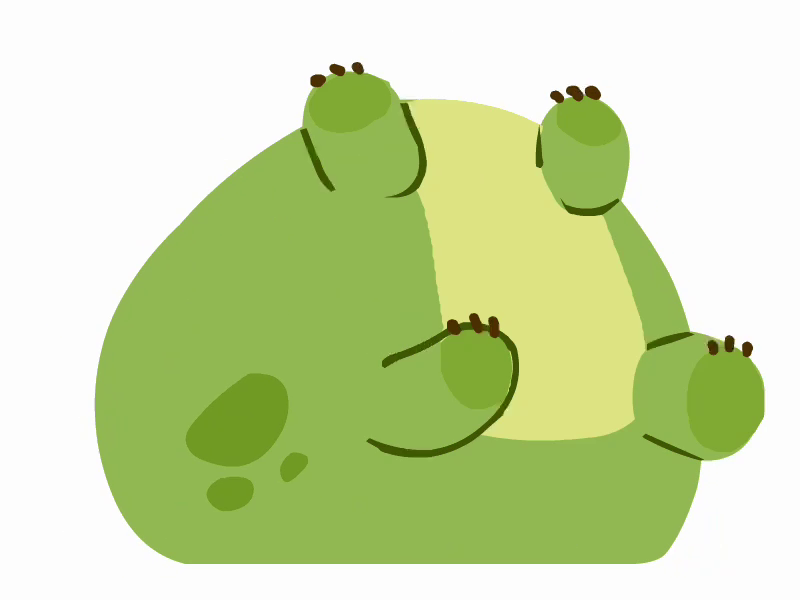

Frames extracted: 8


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# ==== Video path ====
video_path = 'vid.mp4'

# ==== Create output folder ====
output_folder = 'extracted_frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==== Open video using OpenCV ====
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Couldn't open video.")
    exit()

frame_count = 0

while True:
    ret, frame = cap.read()  # Read a frame from the video
    if not ret:
        break  # Exit loop when no frames are left

    # Save frame as an image
    frame_filename = os.path.join(output_folder, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_filename, frame)

    # Display the frame (optional)
    cv2_imshow(frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_count += 1

# Clean up and release resources
cap.release()
cv2.destroyAllWindows()

print(f"Frames extracted: {frame_count}")


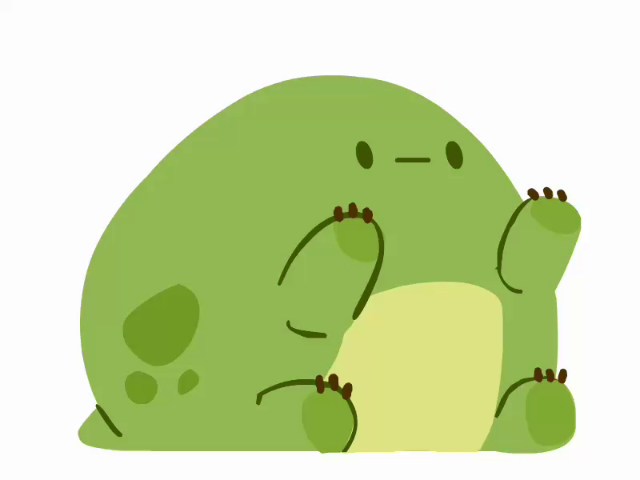

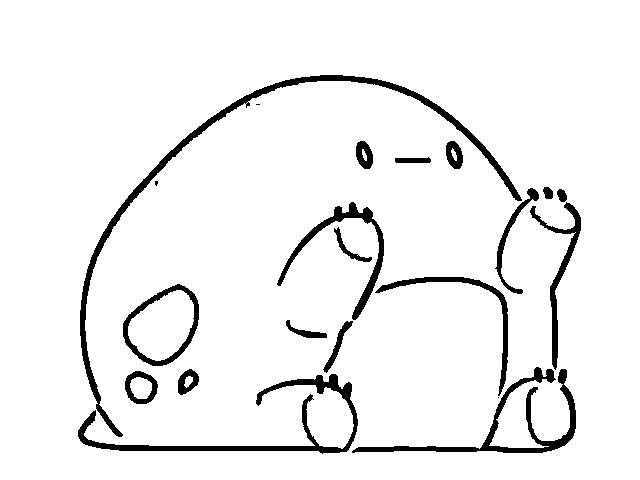

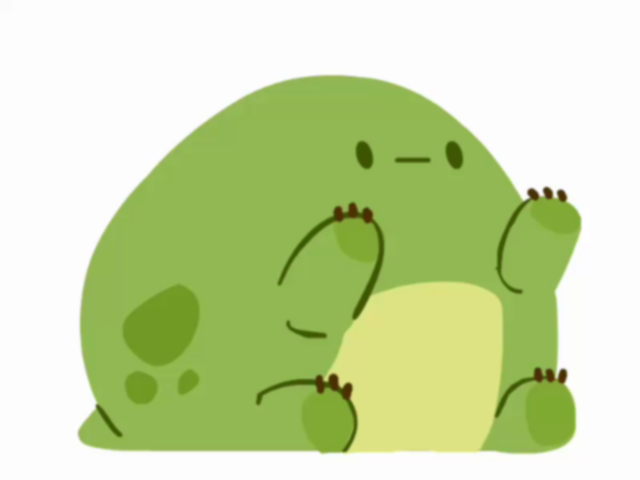

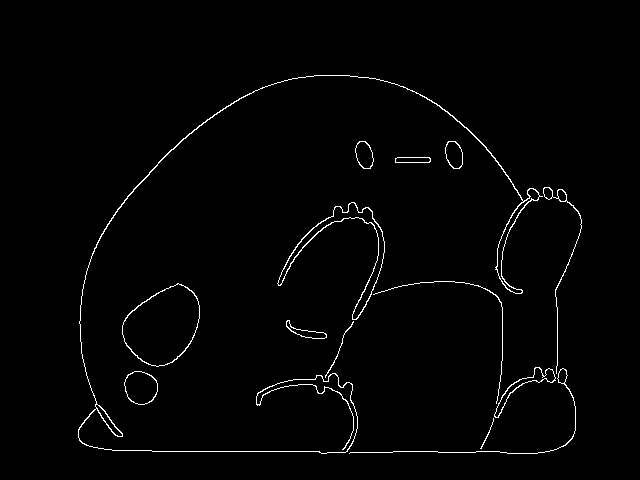

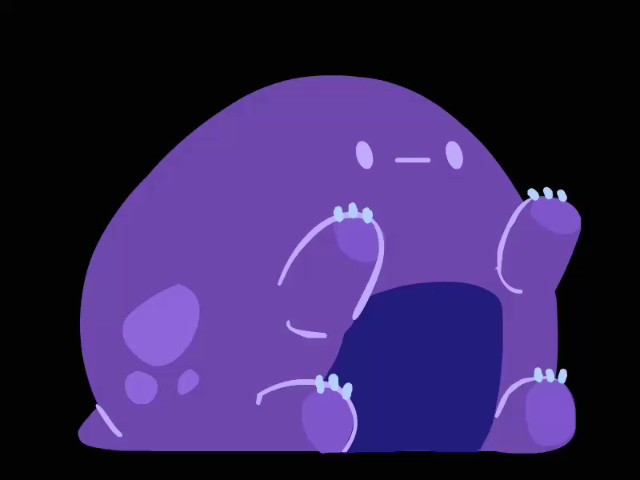

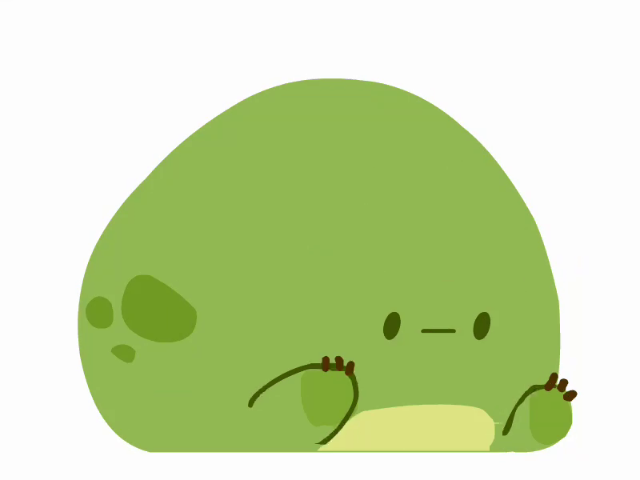

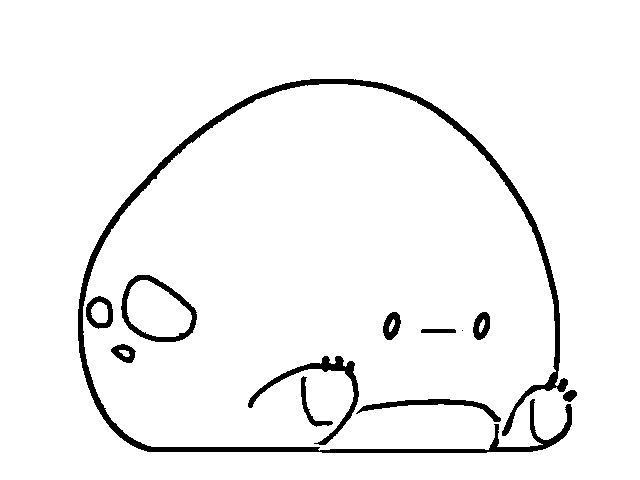

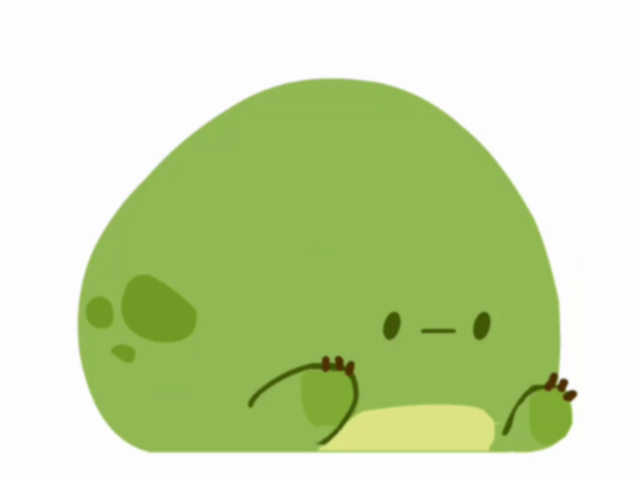

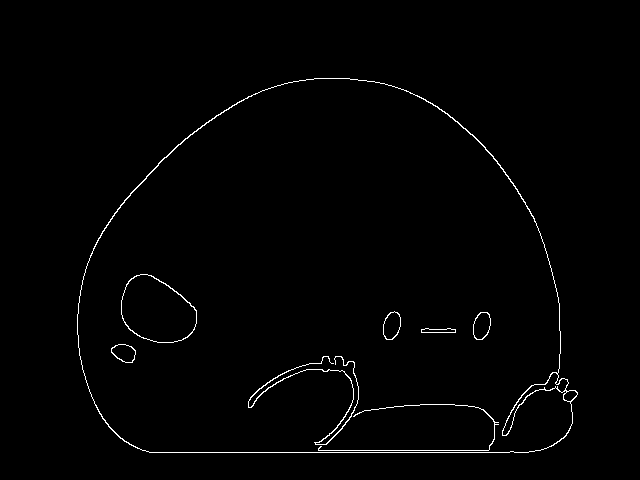

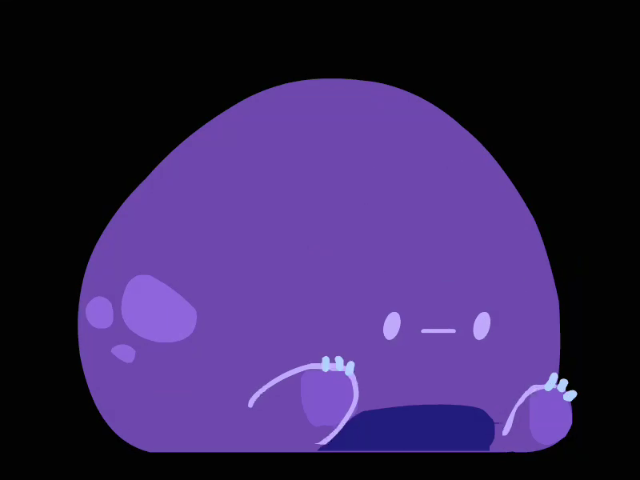

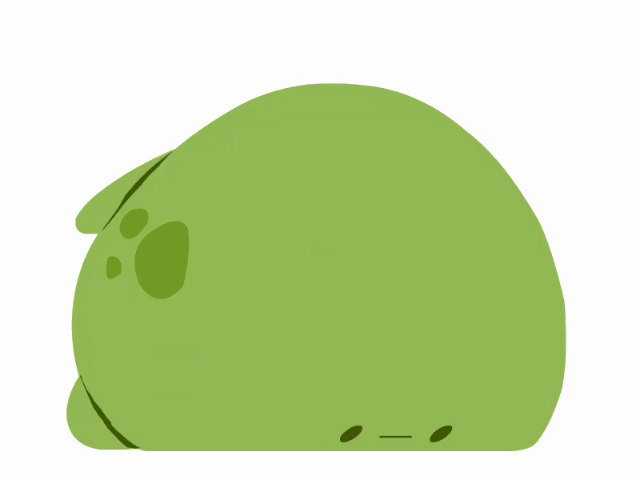

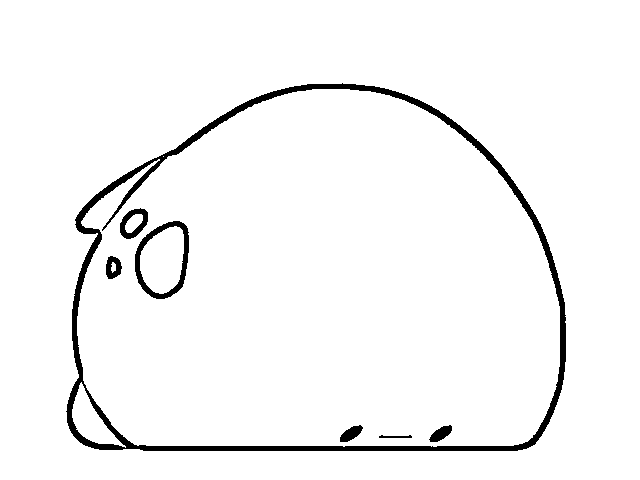

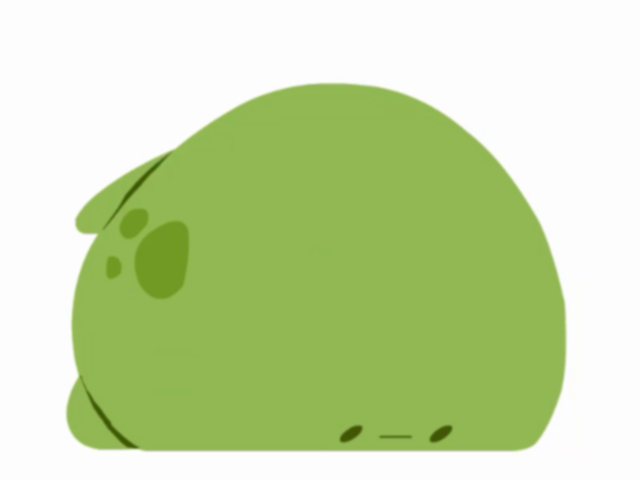

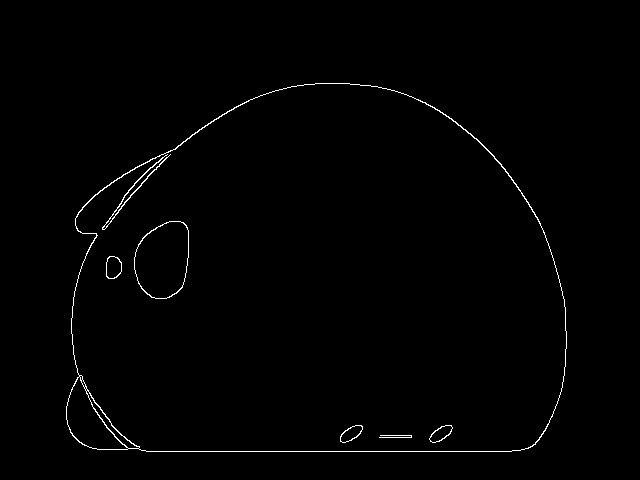

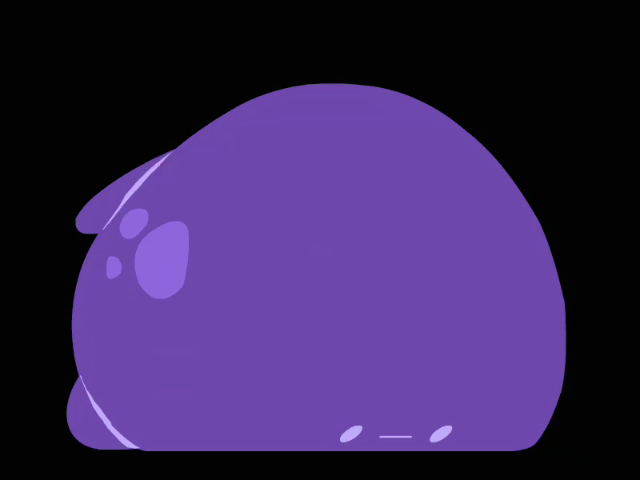

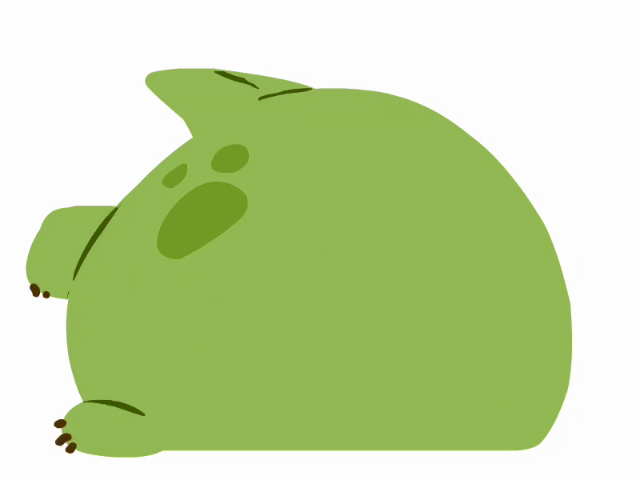

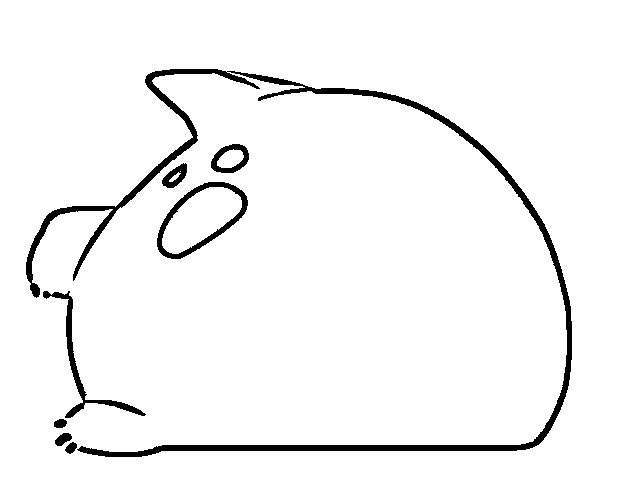

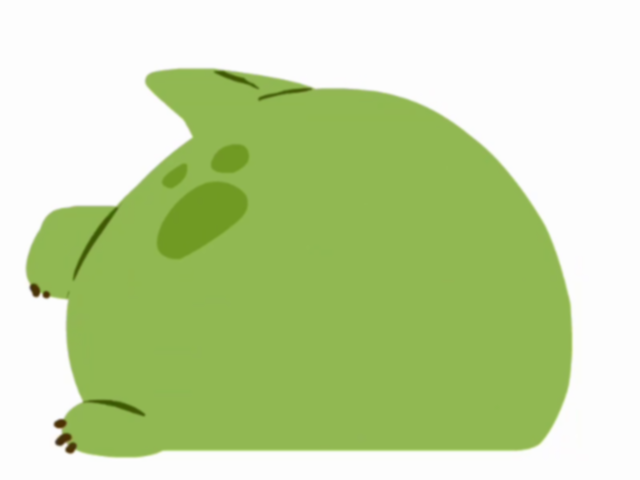

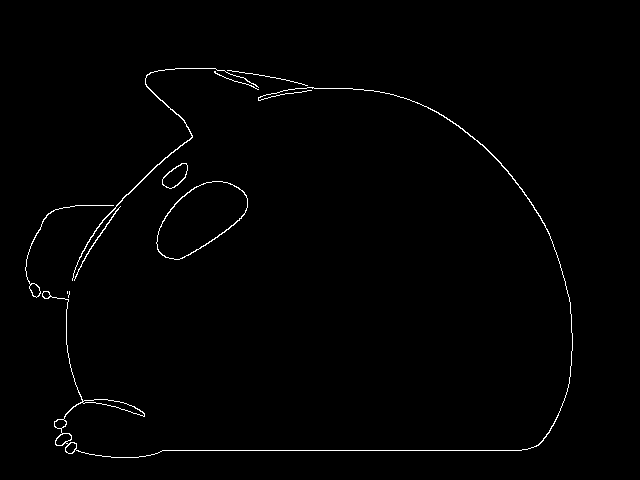

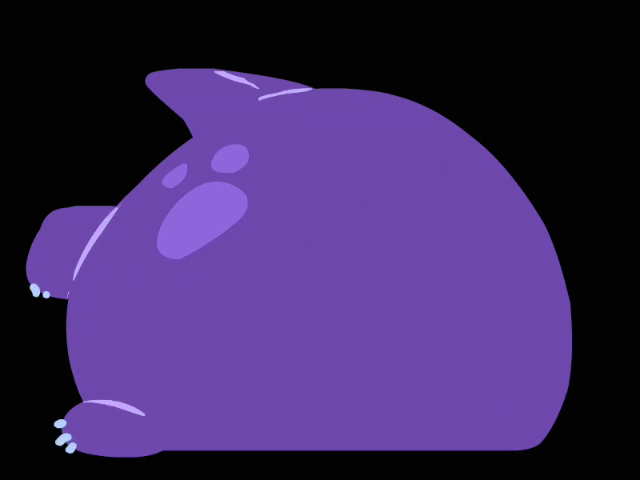

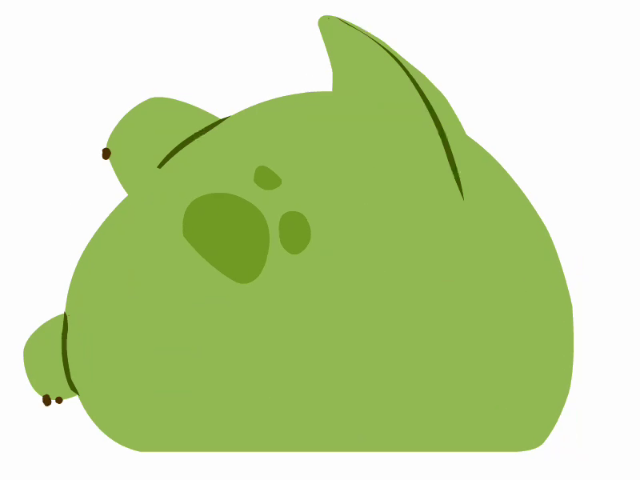

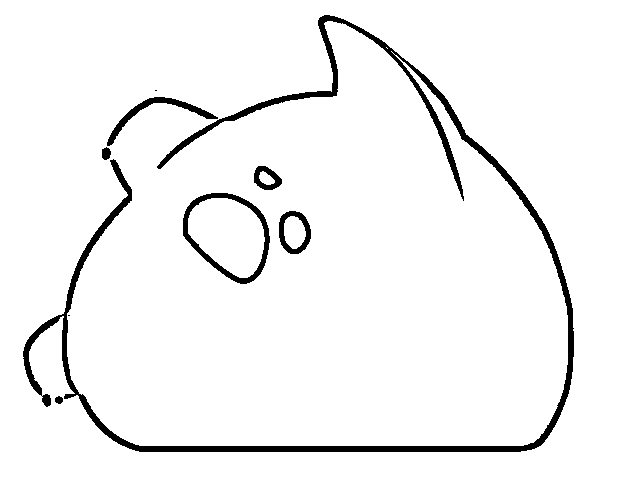

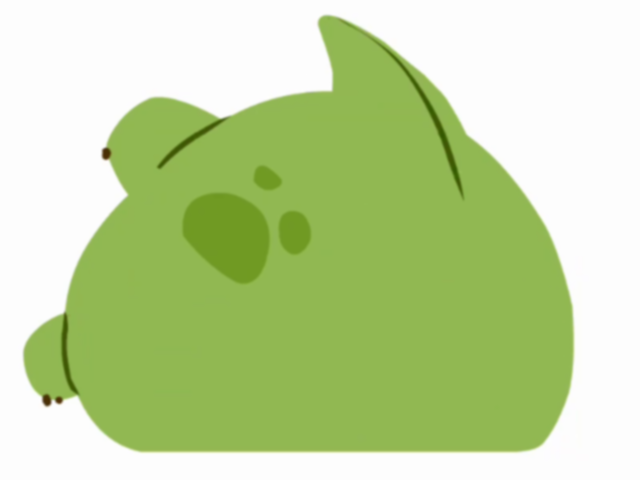

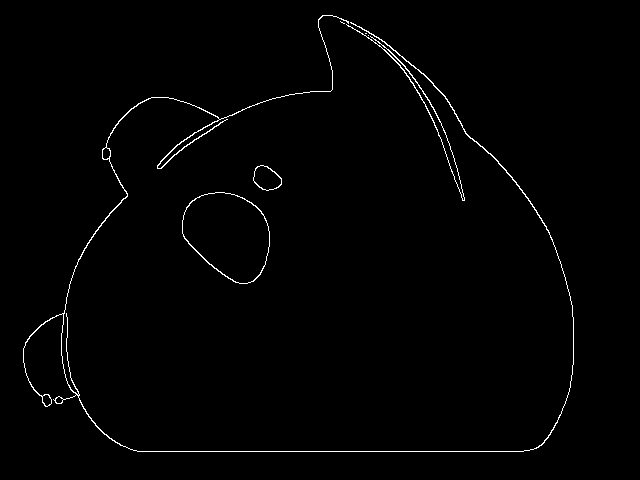

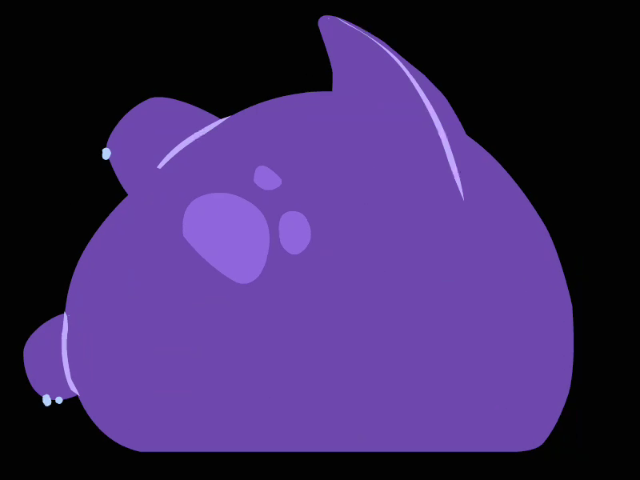

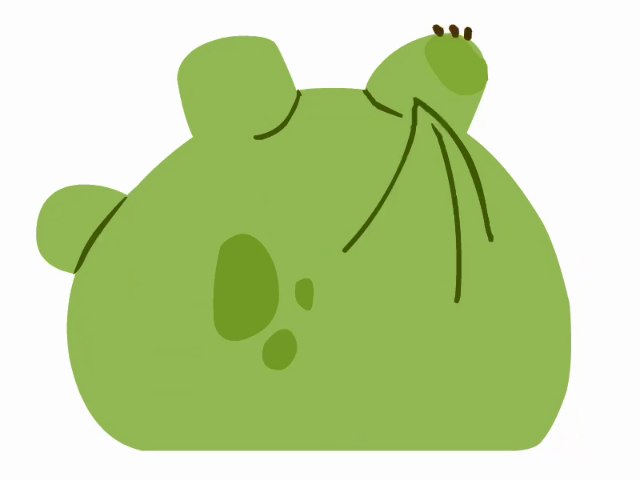

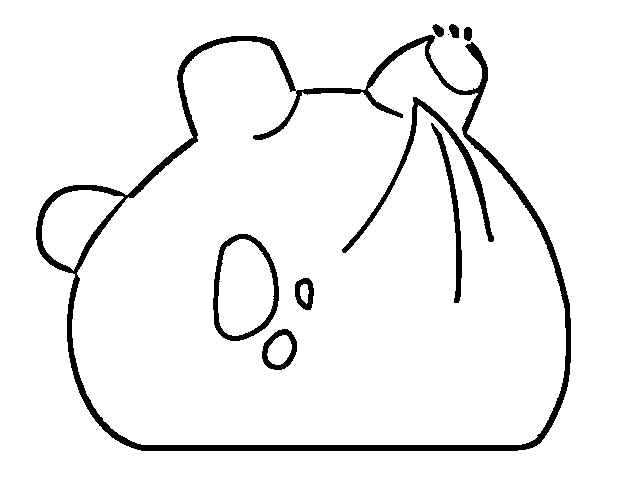

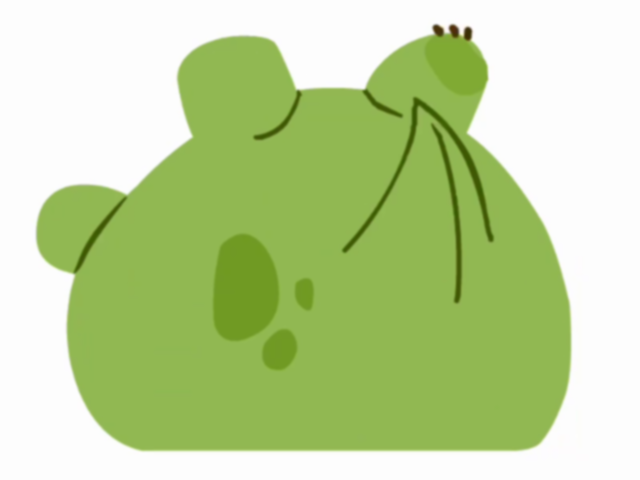

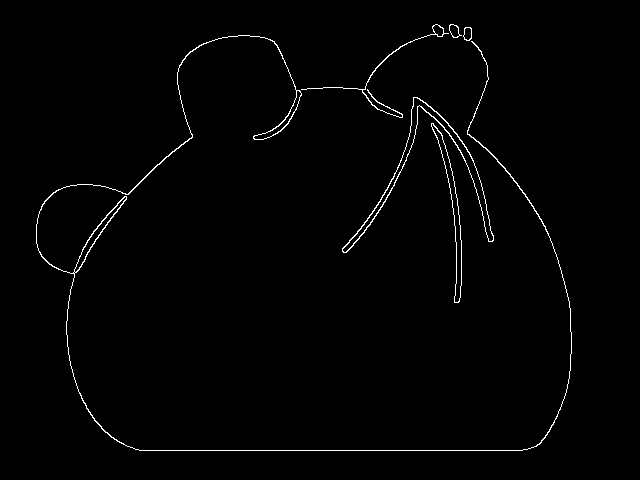

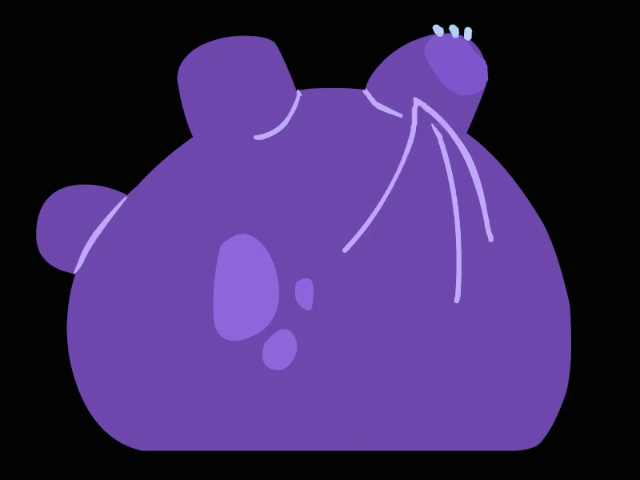

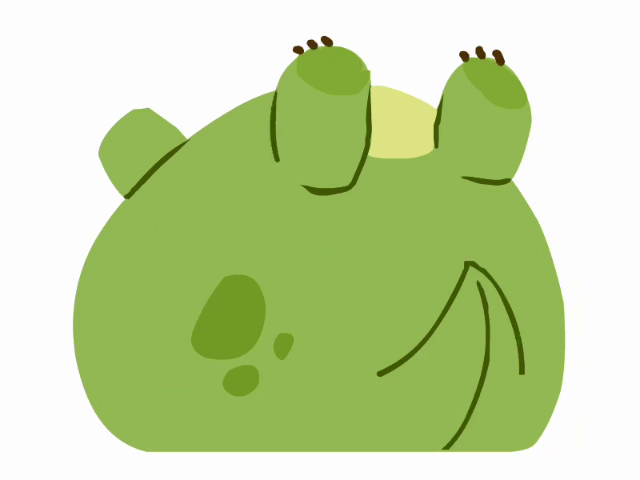

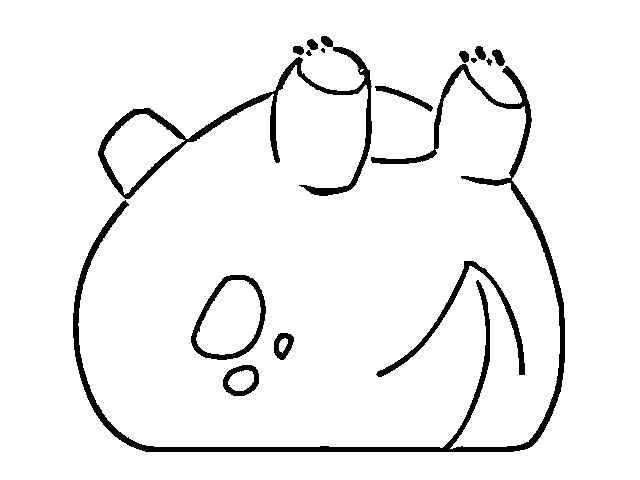

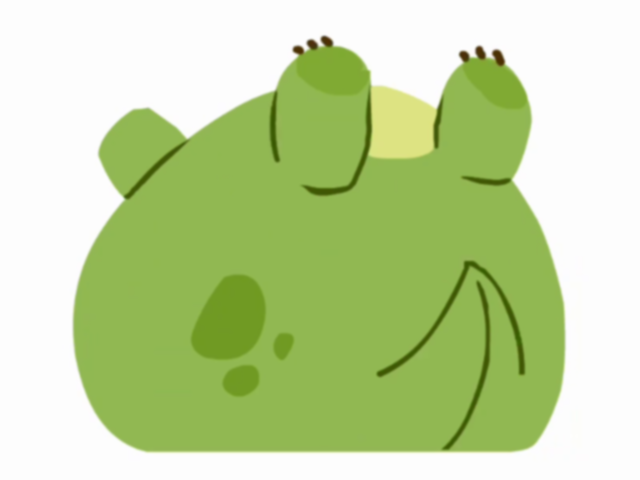

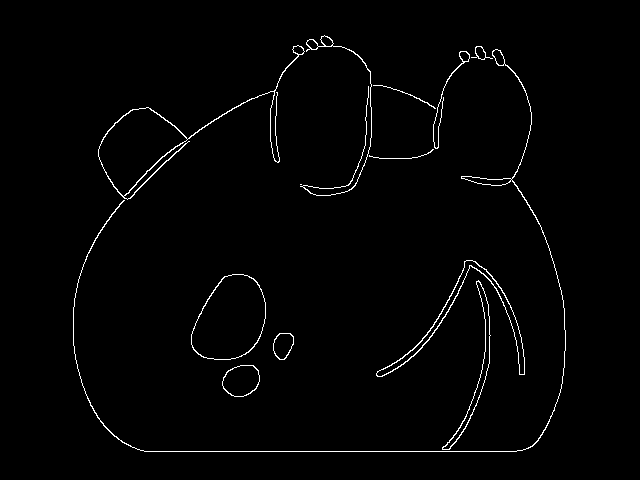

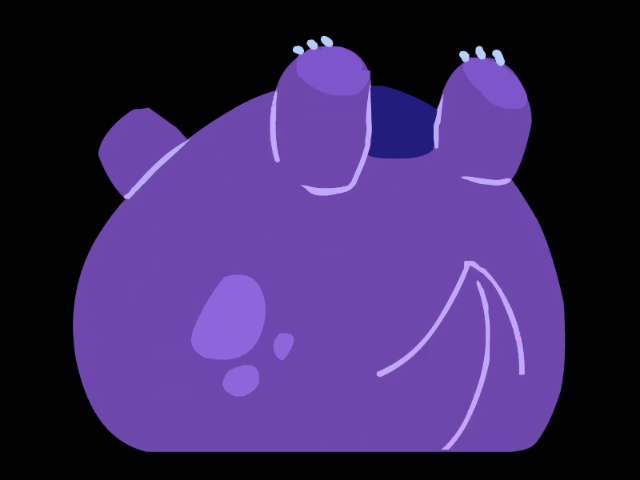

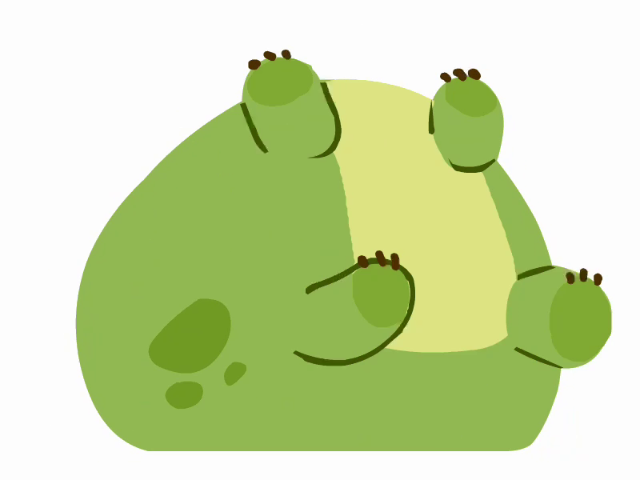

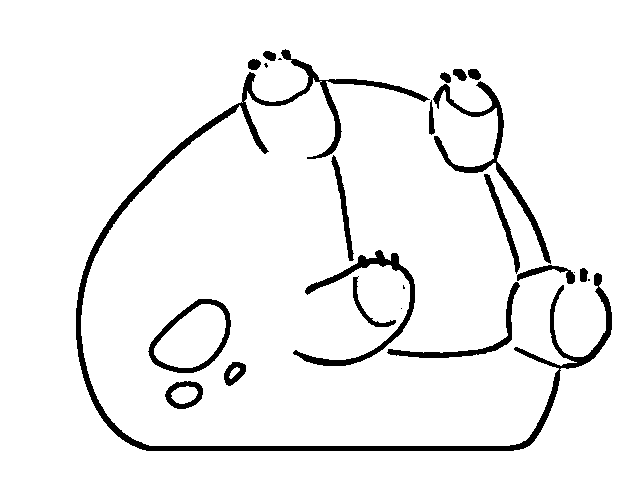

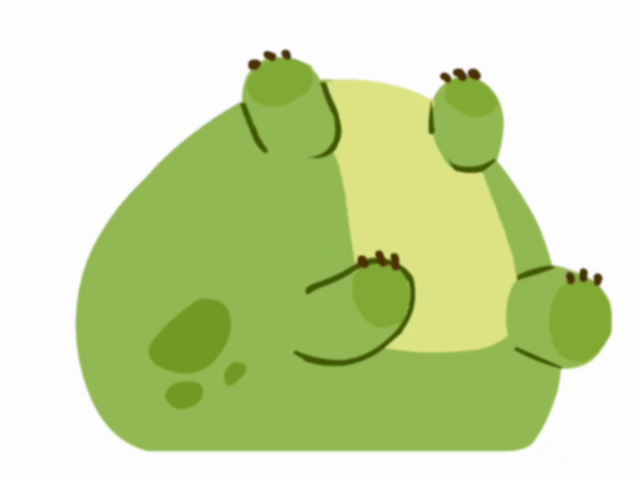

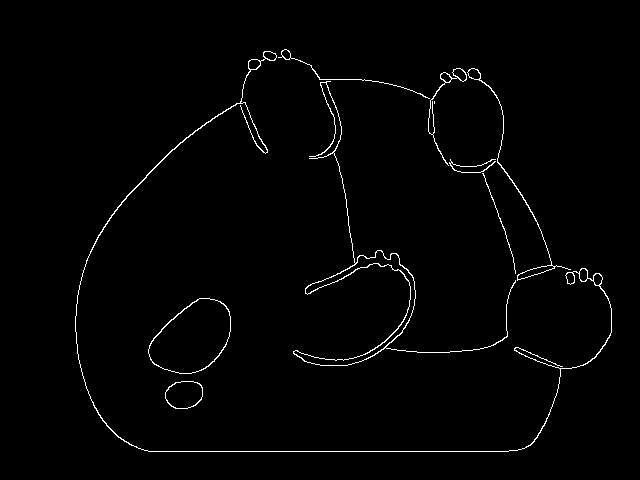

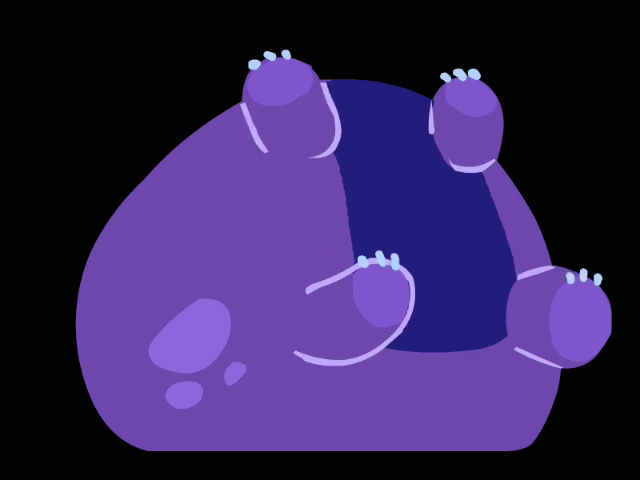

Collage created and saved as 'collage.jpg'.
Processed video frames: 8


In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# ==== Video path ====
video_path = 'vid.mp4'  # Replace with your video path

# ==== Create output folder ====
output_folder = 'processed_frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create a VideoWriter to save the new video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output video
output_video = cv2.VideoWriter('output_video.mp4', fourcc, 30.0, (640, 480))  # 30 FPS, 640x480 resolution

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Couldn't open video. Please check the video path.")
    exit()

frame_count = 0
frames_for_collage = []  # Store frames for collage

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop when no frames are left

    # Resize frame (optional, to standardize size)
    frame = cv2.resize(frame, (640, 480))

    # 1. Adaptive Thresholding (Grayscale)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # 2. Gaussian Smoothing
    gaussian_smooth = cv2.GaussianBlur(frame, (5, 5), 0)

    # 3. Canny Edge Detection
    canny_edges = cv2.Canny(gray, 100, 200)

    # 4. Bitwise NOT operation
    bitwise_not = cv2.bitwise_not(frame)

    # === Show each transformation (visualize each step) ===
    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow in Colab
    cv2_imshow(adaptive_thresh)
    cv2_imshow(gaussian_smooth)
    cv2_imshow(canny_edges)
    cv2_imshow(bitwise_not)

    # Save frames for video creation (e.g., Gaussian Smoothing)
    output_video.write(gaussian_smooth)

    # Store frames for Collage (Every 10th frame)
    if frame_count % 10 == 0:
        frames_for_collage.append(frame)

    frame_count += 1

    # Stop video by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Check if frames were collected for the collage
if len(frames_for_collage) > 0:
    # Create a collage from the selected frames
    collage = np.hstack([np.vstack(frames_for_collage[i:i+5]) for i in range(0, len(frames_for_collage), 5)])

    # Save collage image
    cv2.imwrite('collage.jpg', collage)
    print("Collage created and saved as 'collage.jpg'.")
else:
    print("No frames collected for collage.")

# Clean up and release resources
cap.release()
output_video.release()
cv2.destroyAllWindows()

print(f"Processed video frames: {frame_count}")
